## Data Dictionary

Data Dictionary
battery_power = Total energy a battery can store in one time measured in mAh.

blue = Has bluetooth or not. | 1: Has , 0: doesnt have

clock_speed = Speed at which microprocessor executes instructions.

dual_sim = Has dual sim support or not | 1: support, 0: doesnt support

fc = Front Camera mega pixels.

four_g = Has 4G or not. | 1: Has , 0: doesnt have

int_memory = Internal memory in gigabytes.

m_dep = Mobile Depth in cm.

mobile_wt = Weight of mobile phone.

n_cores = Number of cores of processor.

pc = Primary Camera mega pixels.

px_height = Pixel Resolution Height.

px_width = Pixel Resolution Width.

ram = Random Access Memory in Mega Bytes.

sc_h = Screen Height of mobile in cm.

sc_w = Screen Width of mobile in cm.

talk_time = Longest time that a single battery charge will last when you are.

three_g = Has 3G or not. | 1: Has, 0:Doesnt have

touch_screen = Has touch screen or not. | 1: Has, 0:Doesnt have

wifi = Has wifi or not. | 1:Has, 0:Doesnt have

price_range = This is the target variable. | 3:Very High Cost, 2:High Cost, 1:Medium Cost, 0:Low Cost

# Imports

In [1]:
!pip install pdpbox

  Using cached matplotlib-3.1.1.tar.gz (37.8 MB)
  Running setup.py clean for matplotlib
Failed to build matplotlib
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.3.2
    Uninstalling matplotlib-3.3.2:


  ERROR: Command errored out with exit status 1:
   command: 'C:\ProgramData\Anaconda3\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\justi\\AppData\\Local\\Temp\\pip-install-thdwydnu\\matplotlib_5001da4c694147f2a6d238b658af4992\\setup.py'"'"'; __file__='"'"'C:\\Users\\justi\\AppData\\Local\\Temp\\pip-install-thdwydnu\\matplotlib_5001da4c694147f2a6d238b658af4992\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\justi\AppData\Local\Temp\pip-wheel-6gm52bne'
       cwd: C:\Users\justi\AppData\Local\Temp\pip-install-thdwydnu\matplotlib_5001da4c694147f2a6d238b658af4992\
  Complete output (538 lines):
  Edit setup.cfg to change the build options
  
  BUILDING MATPLOTLIB
    matplotlib: yes [3.1.1]
        python: yes [3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit
                    (AMD64)]]
   

In [29]:
#Import statements
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.ensemble import BaggingRegressor, RandomForestClassifier, AdaBoostRegressor
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (mean_absolute_error, classification_report, 
                             accuracy_score, confusion_matrix, plot_confusion_matrix)

from pdpbox.pdp import pdp_interact, pdp_interact_plot

# EDA AND Data Visualization

In [3]:
#Changing the option of the number of columns that is shown when looking at the DataFrame
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
#Loading in my csv file
train = pd.read_csv(r'C:\Users\justi\OneDrive\Documents\Cell_phone_prediction\train.csv')
test = pd.read_csv(r'C:\Users\justi\OneDrive\Documents\Cell_phone_prediction\test.csv')

In [5]:
train.shape

(2000, 21)

In [36]:
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [7]:
#Looking to see if there is any null values in the DataFrame
train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [8]:
#Looking at the correlation between price range and the other columns
print(f'Co-Relation High to Low:\n{train.corr().price_range.sort_values(ascending=False)}')

Co-Relation High to Low:
price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000853
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64


### Correlation of the columns in a heatmap

<AxesSubplot:>

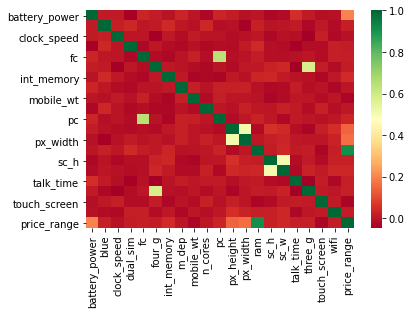

In [9]:
#Looking at the correlation of the columns in a heatmap
sns.heatmap(train.corr(),cmap="RdYlGn")

### Boxplot comparing price range to battery power

<AxesSubplot:xlabel='price_range', ylabel='battery_power'>

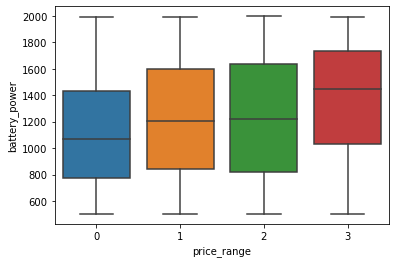

In [10]:
#Boxplot comparing price range to battery power
sns.boxplot(x="price_range", y="battery_power", data=train)

### Joint plot comparing battery power and ram to price range

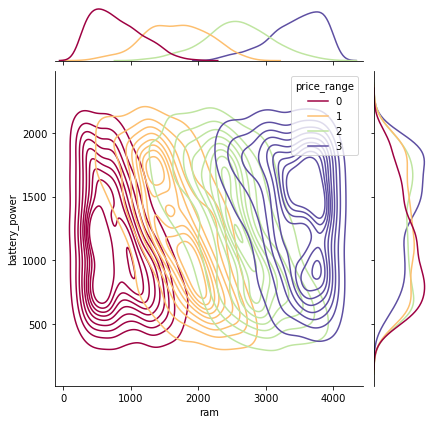

In [11]:
#Joint plot comparing battery power and ram to price range

color = sns.color_palette("Spectral", as_cmap=True)

g = sns.jointplot(data=train,
              x='ram',
              y='battery_power',
              kind='kde',
              hue='price_range',
              palette=color);


# Splitting up my Data

In [12]:
#Splitting my data in X(all columns expect for the target) y(only the target column)

target = 'price_range'

X = train.drop(columns=target)

y=train[target]

In [13]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
#making sure the shape of X_train is correct
X_train.shape

(1400, 20)

In [15]:
#making sure the shape of y_train is correct
y_train.shape

(1400,)

# Models

In [16]:
#Printing out my Baseline accuracy
print('Baseline accuracy:', y_train.value_counts(normalize=True).max())

Baseline accuracy: 0.25285714285714284


### LogisticRegression Model

In [17]:
#Making a LogisticRegression pipeline with a StandardScaler in it
model_lr = make_pipeline(StandardScaler(), LogisticRegression())
model_lr.fit(X_train, y_train);

In [18]:
print('Training Accuracy (LOGR):', model_lr.score(X_train, y_train))
print('Validation Accuracy (LOGR):', model_lr.score(X_val, y_val))

Training Accuracy (LOGR): 0.9764285714285714
Validation Accuracy (LOGR): 0.9583333333333334


Logistic Regression
              precision    recall  f1-score   support

           0       0.98      0.95      0.97       151
           1       0.91      0.97      0.94       146
           2       0.99      0.91      0.95       148
           3       0.96      0.99      0.98       155

    accuracy                           0.96       600
   macro avg       0.96      0.96      0.96       600
weighted avg       0.96      0.96      0.96       600



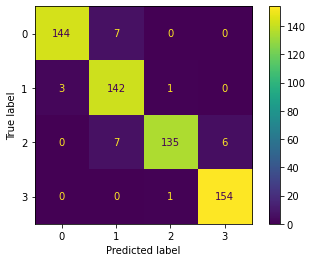

In [19]:
#Creating a classification report and confusion matrix of the LogisticRegressionm model
print('Logistic Regression')
print(classification_report(y_val, model_lr.predict(X_val)))
plot_confusion_matrix(model_lr, X_val, y_val);

### RandomForestClassifier Model

In [20]:
#Making a Random Forest Classifier pipeline
model_rf = make_pipeline(
    SimpleImputer(),
    RandomForestClassifier(random_state=42, n_jobs=-1)
                        )
model_rf.fit(X_train, y_train);

In [21]:
print('Training Accuracy (RF):', model_rf.score(X_train, y_train))
print('Validation Accuracy (RF):', model_rf.score(X_val, y_val))

Training Accuracy (RF): 1.0
Validation Accuracy (RF): 0.8666666666666667


Random Forest
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       151
           1       0.82      0.82      0.82       146
           2       0.79      0.78      0.79       148
           3       0.92      0.91      0.92       155

    accuracy                           0.87       600
   macro avg       0.87      0.87      0.87       600
weighted avg       0.87      0.87      0.87       600



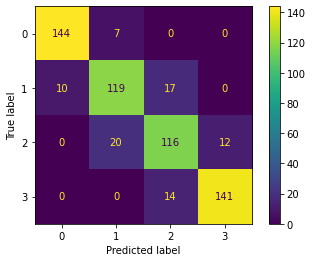

In [22]:
#Creating a classification report and confusion matrix of the RandomForestClassifier model
print('Random Forest')
print(classification_report(y_val, model_rf.predict(X_val)))
plot_confusion_matrix(model_rf, X_val, y_val)

# Tuning Model

In [23]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=42)

In [24]:
model_lr_bag = GridSearchCV(BaggingRegressor(model_lr),
param_grid =  {
               'n_estimators':np.arange(50,300,50),
               'max_features':np.arange(1,30,2)
          },
          cv=cv, n_jobs=-1)
            
model_lr_bag.fit(X_train,y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=5, n_splits=10, random_state=42),
             estimator=BaggingRegressor(base_estimator=Pipeline(steps=[('standardscaler',
                                                                        StandardScaler()),
                                                                       ('logisticregression',
                                                                        LogisticRegression())])),
             n_jobs=-1,
             param_grid={'max_features': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]),
                         'n_estimators': array([ 50, 100, 150, 200, 250])})

In [25]:
print('Best score for `model_lr_bag`:', model_lr_bag.best_score_)
print('Best params for `mode_lr_bag`:', model_lr_bag.best_params_)

Best score for `model_lr_bag`: 0.9699079813193291
Best params for `mode_lr_bag`: {'max_features': 19, 'n_estimators': 150}


### Checking out the new validation score in the GridSearchCV
print('Validation Accuracy Score:', model_lr_bag.score(X_val, y_val))